이것은 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 책의 노트북이다. 가독성을 위해 실행 가능한 코드 블록과 섹션 제목만 포함하고 책의 다른 모든 텍스트 단락, 그림 및 의사 코드는 생략한다.

**무슨 일이 일어나고 있는지 확인하고 싶다면 책과 함께 노트북을 사용하는 것을 권장한다.**

이 노트북은 TensorFlow 2.6 기반이다. (옮긴이: 버전 2.10.0, 애플 실리콘 M1 으로 테스트)

# 4 신경망으로 시작하기: 분류와 회귀

## 4.1 영화 리뷰 분류: 이진 분류 예제

### 4.1.1 IMDB 데이터셋
- IMDB 감성 분류 데이터셋: [tf.keras.datasets.imdb](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb)

**IMDB 데이터셋 적재** 

In [76]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [77]:
train_data.shape

(25000,)

In [78]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [79]:
train_labels[0]

1

In [80]:
max([max(sequence) for sequence in train_data])

9999

**리뷰를 다시 텍스트로 디코딩**

In [81]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [82]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 4.1.2 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [83]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # zeros(shape, dtype=float, order='C', *, like=None)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [84]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [85]:
import numpy as np
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 4.1.3 모델 구성

**모델 정의**

In [86]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**모델 컴파일**

In [87]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 4.1.4 접근 방식 검증

**검증 세트 별도 설정**

In [100]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**모델 훈련**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-12-08 15:09:03.688971: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-08 15:09:03.983670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.7881

2022-12-08 15:09:04.969408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 32ms/step - loss: 0.5111 - accuracy: 0.7881 - val_loss: 0.3929 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3054 - accuracy: 0.9055 - val_loss: 0.3060 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2227 - accuracy: 0.9289 - val_loss: 0.2782 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1735 - accuracy: 0.9431 - val_loss: 0.3229 - val_accuracy: 0.8725
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1456 - accuracy: 0.9509 - val_loss: 0.2873 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1157 - accuracy: 0.9645 - val_loss: 0.3231 - val_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0985 - accuracy: 0.9714 - val_loss: 0.3109 - val_accuracy: 0.8846
Epoch 8/20
30/30 [======

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련 및 검증 손실 그리기(plot)**

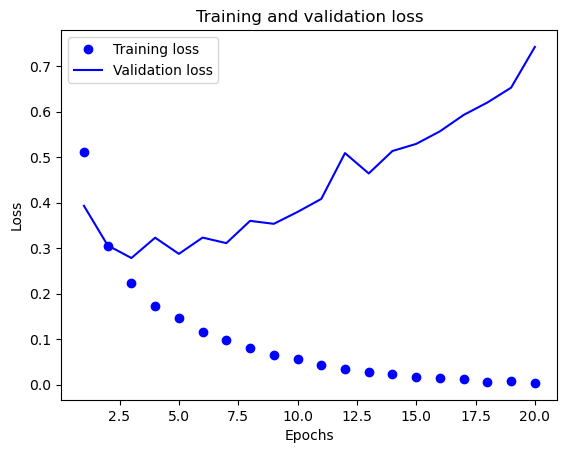

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련 및 검증 정확도 그리기**

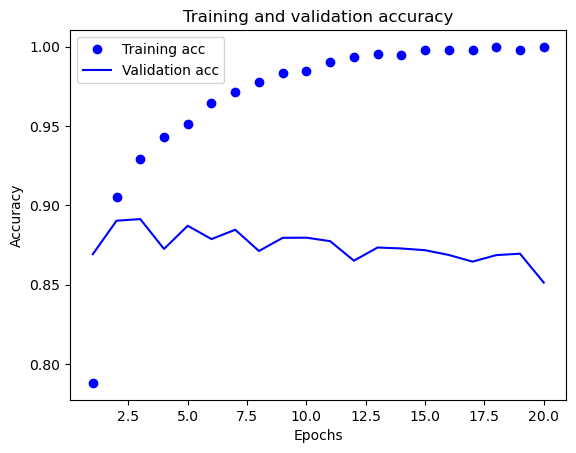

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b-", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**처음부터 모델 재 훈련**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


2022-12-08 15:09:14.612894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 11ms/step - loss: 0.4320 - accuracy: 0.8284
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2491 - accuracy: 0.9133
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1975 - accuracy: 0.9292
Epoch 4/4
 20/782 [..............................] - ETA: 4s - loss: 0.2961 - accuracy: 0.8734

2022-12-08 15:09:18.083658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3066 - accuracy: 0.8786


In [19]:
results # 손실 및 측정지표(여기서는 정확도) 반환

[0.30656692385673523, 0.8786000609397888]

### 4.1.5 새로운 데이터 예측 생성에 훈련된 모델 사용

In [20]:
model.predict(x_test)

 71/782 [=>............................] - ETA: 1s

2022-12-08 15:09:22.242962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step


array([[0.14479086],
       [0.9997968 ],
       [0.8302233 ],
       ...,
       [0.10251357],
       [0.04603499],
       [0.5099642 ]], dtype=float32)

### 4.1.6 추가 실험

### 4.1.7 마무리

## 4.2 뉴스 기사 분류: 다중 분류 예제

### 4.2.1 로이터(Reuter) 데이터셋
- 로이터 주제 분류 데이터셋: [tf.keras.datasets.reuters](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters)

**로이터 데이터셋 적재**

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [22]:
train_data.shape

(8982,)

In [23]:
test_data.shape

(2246,)

In [24]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**기사를 다시 텍스트로 디코딩**

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [26]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [27]:
train_labels[10]

3

In [28]:
min([label for label in train_labels])

0

In [29]:
max([label for label in train_labels])

45

### 4.2.2 데이터 준비

**입력 데이터 인코딩**

In [30]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩**

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [32]:
# 케라스 내장 원-핫 인코딩 (to_categorical??)
from tensorflow.keras.utils import to_categorical
# 클래스 벡터(정수)를 이진 클래스 행별로 변환
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4.2.3 모델 구성

**모델 정의**

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**모델 컴파일**

In [34]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 4.2.4 접근 방식 검증

**검증 세트 별도 설정**

In [75]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**모델 훈련**

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/16 [>.............................] - ETA: 6s - loss: 3.8447 - accuracy: 0.0039

2022-12-08 15:09:24.939867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 26ms/step - loss: 2.6496 - accuracy: 0.5112 - val_loss: 1.7620 - val_accuracy: 0.6280
Epoch 2/20
10/16 [=================>............] - ETA: 0s - loss: 1.5123 - accuracy: 0.6891

2022-12-08 15:09:25.441312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 15ms/step - loss: 1.4380 - accuracy: 0.7015 - val_loss: 1.3480 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0716 - accuracy: 0.7740 - val_loss: 1.1497 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8407 - accuracy: 0.8266 - val_loss: 1.0468 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6743 - accuracy: 0.8591 - val_loss: 0.9788 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5360 - accuracy: 0.8896 - val_loss: 0.9500 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4357 - accuracy: 0.9102 - val_loss: 0.9269 - val_accuracy: 0.8120
Epoch 8/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3550 - accuracy: 0.9247 - val_loss: 0.9283 - val_accuracy: 0.8060
Epoch 9/20
16/16 [======

**훈련 및 검증 손실 그리기 (plot)**

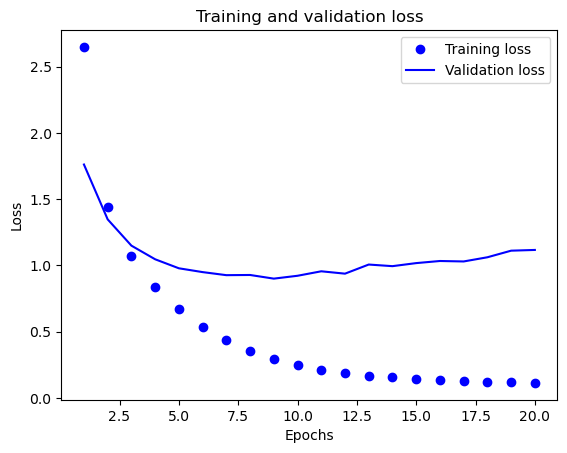

In [37]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**훈련 및 검증 정확도 그리기**

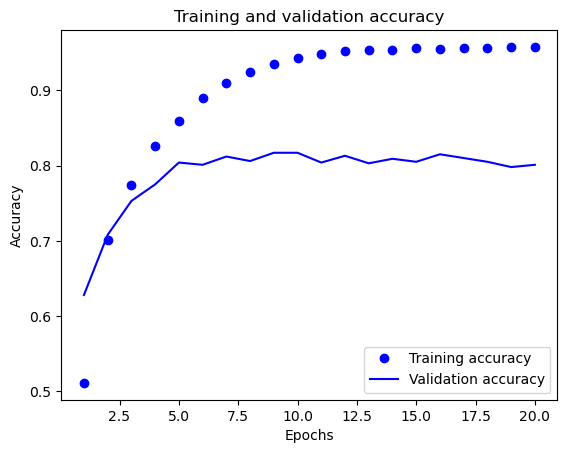

In [38]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**처음부터 모델 재 훈련**

In [39]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
 1/18 [>.............................] - ETA: 5s - loss: 3.8562 - accuracy: 0.0020

2022-12-08 15:09:30.631762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 15ms/step - loss: 2.7233 - accuracy: 0.5165
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.4413 - accuracy: 0.7067
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.0534 - accuracy: 0.7788
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.8243 - accuracy: 0.8273
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6605 - accuracy: 0.8685
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.5320 - accuracy: 0.8927
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4326 - accuracy: 0.9112
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3551 - accuracy: 0.9243
Epoch 9/9
13/71 [====>.........................] - ETA: 0s - loss: 0.8343 - accuracy: 0.8173

2022-12-08 15:09:32.920223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 9ms/step - loss: 0.9236 - accuracy: 0.7992


In [40]:
results

[0.9236456155776978, 0.799198567867279]

In [41]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19590382902938558

### 4.2.5 새로운 데이터 예측 생성

In [42]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


2022-12-08 15:09:33.663673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [43]:
predictions[0].shape

(46,)

In [44]:
np.sum(predictions[0])

1.0

In [45]:
np.argmax(predictions[0])

3

In [46]:
np.argmax(y_test[0])

3

In [47]:
test_labels[0]

3

### 4.2.6 레이블과 손실을 다루는 다른 방법

In [48]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [49]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [50]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
 1/18 [>.............................] - ETA: 6s - loss: 3.8358 - accuracy: 0.0059

2022-12-08 15:09:34.204868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 12ms/step - loss: 2.5205 - accuracy: 0.5706
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3498 - accuracy: 0.7169
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9973 - accuracy: 0.7884
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7715 - accuracy: 0.8391
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6138 - accuracy: 0.8724
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4851 - accuracy: 0.8982
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3896 - accuracy: 0.9168
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3227 - accuracy: 0.9306
Epoch 9/9
22/71 [========>.....................] - ETA: 0s - loss: 0.9034 - accuracy: 0.8068

2022-12-08 15:09:36.029363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 5ms/step - loss: 0.9549 - accuracy: 0.7983


In [51]:
results

[0.9549098610877991, 0.7983081340789795]

### 4.2.7 충분히 큰 중간 층의 중요성

**정보 병목을 가진 모델**

In [52]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
 1/63 [..............................] - ETA: 24s - loss: 3.8351 - accuracy: 0.0234

2022-12-08 15:09:36.768969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 17ms/step - loss: 3.0298 - accuracy: 0.3231 - val_loss: 2.2100 - val_accuracy: 0.5560
Epoch 2/20
 1/63 [..............................] - ETA: 0s - loss: 2.0714 - accuracy: 0.5938

2022-12-08 15:09:37.845167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 14ms/step - loss: 1.7748 - accuracy: 0.5877 - val_loss: 1.6075 - val_accuracy: 0.5920
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4179 - accuracy: 0.6087 - val_loss: 1.4636 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2633 - accuracy: 0.6720 - val_loss: 1.4145 - val_accuracy: 0.6660
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1634 - accuracy: 0.6932 - val_loss: 1.3964 - val_accuracy: 0.6650
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0889 - accuracy: 0.7036 - val_loss: 1.4079 - val_accuracy: 0.6760
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0255 - accuracy: 0.7212 - val_loss: 1.4001 - val_accuracy: 0.6740
Epoch 8/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9708 - accuracy: 0.7324 - val_loss: 1.4371 - val_accuracy: 0.6750
Epoch 9/20
63/63 [======

### 4.2.8 이후 실험

### 4.2.9 마무리

## 4.3 주택 가격 예측: 회귀 예제

### 4.3.1 보스턴(Boston) 주택 가격 데이터셋
- 보스턴 주택 가격 회귀 데이터셋: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing)

**보스턴 주택 가격 데이터셋 적재**

In [53]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [54]:
train_data.shape

(404, 13)

In [55]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [56]:
test_data.shape

(102, 13)

In [57]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 4.3.2 데이터 준비

**데이터 정규화(Normalizing)**
- 옮긴이: 실제로는 표준화(Standardization)이다. - 표준정규분포의 속성을 갖도록 특성을 재조정

$$z = \frac{x - \mu}{\sigma}$$

In [68]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [69]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

### 4.3.3 모델 구성

**모델 정의**

In [70]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", 
                  loss="mse", # Mean Squared Error
                  metrics=["mae"]) # Mean Absolute Error
    return model

### 4.3.4  K-겹 검증을 사용하여 접근 방식 검증
- 옮긴이: scikit-learn 모듈의 KFold, StratifiedKFold 사용해 보자

**K-겹 검증**

In [71]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


2022-12-08 15:51:23.081107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:51:33.787731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-12-08 15:51:34.081069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:51:44.655325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-12-08 15:51:44.949249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:51:55.546125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-12-08 15:51:55.853047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:52:06.325177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [72]:
all_scores

[1.9503178596496582, 2.4540855884552, 2.430088758468628, 2.6011171340942383]

In [73]:
np.mean(all_scores)

2.358902335166931

**각 겹의 검증 로그 저장**

In [74]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0


2022-12-08 15:52:13.983928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:52:14.406005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2022-12-08 15:53:20.524948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:53:20.931643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2022-12-08 15:54:26.807210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:54:27.264156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2022-12-08 15:55:31.710833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-08 15:55:32.150244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


**K-겹 검증 점수 평균을 기록하기**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**검증 점수 그리기**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**처음 20개 데이터 지점을 제외하고 검증 점수 그리기**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**최종 모델 훈련**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### 4.3.5 새로운 데이터 예측 생성

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### 4.3.6 마무리

## 4.4 요약